# import liboqs-python

The Open Quantum Safe (OQS) project has the goal of developing and prototyping quantum-resistant cryptography.

liboqs-python offers a Python 3 wrapper for the Open Quantum Safe liboqs C library, which is a C library for quantum-resistant cryptographic algorithms.

In [1]:
!sudo apt update
!sudo apt install cmake ninja-build libssl-dev python3-pip git

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [810 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,695 kB]
Get:13 http://archive.ubuntu.com/ubuntu

In [2]:
!git clone --branch main --single-branch https://github.com/open-quantum-safe/liboqs
%cd liboqs
!mkdir build
%cd build
!cmake -GNinja -DCMAKE_INSTALL_PREFIX=install -DBUILD_SHARED_LIBS=ON ..
!ninja
!ninja install
%cd ../..

Cloning into 'liboqs'...
remote: Enumerating objects: 27838, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 27838 (delta 153), reused 227 (delta 114), pack-reused 27503
Receiving objects: 100% (27838/27838), 114.26 MiB | 21.61 MiB/s, done.
Resolving deltas: 100% (20616/20616), done.
/content/liboqs
/content/liboqs/build
-- The C compiler identification is GNU 11.4.0
-- The ASM compiler identification is GNU
-- Found assembler: /usr/bin/cc
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Performing Test CC_SUPPORTS_WA_NOEXECSTACK
-- Performing Test CC_SUPPORTS_WA_NOEXECSTACK - Success
-- Performing Test LD_SUPPORTS_WL_Z_NOEXECSTACK
-- Performing Test LD_SUPPORTS_WL_Z_NOEXECSTACK - Success
-- Performing Test CMAKE_HAVE_LIBC_PTHREAD
-- Performing Test CMAKE_HAVE_LIBC_

In [3]:
import os
install_path = '/content/liboqs/build/install'
os.environ['CPATH'] = os.path.join(install_path, 'include')
os.environ['LIBRARY_PATH'] = os.path.join(install_path, 'lib')
os.environ['LD_LIBRARY_PATH'] = os.path.join(install_path, 'lib')
os.environ['PKG_CONFIG_PATH'] = os.path.join(install_path, 'lib/pkgconfig')


In [4]:
!git clone --branch main --single-branch https://github.com/open-quantum-safe/liboqs-python
%cd liboqs-python
!python3 -m pip install .
%cd ..

Cloning into 'liboqs-python'...
remote: Enumerating objects: 663, done.
remote: Counting objects: 100% (231/231), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 663 (delta 184), reused 159 (delta 146), pack-reused 432
Receiving objects: 100% (663/663), 139.94 KiB | 1.52 MiB/s, done.
Resolving deltas: 100% (341/341), done.
/content/liboqs-python
Processing /content/liboqs-python
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 3.1 MB/s eta 0:00:00
  Created wheel for liboqs-python: filename=liboqs_python-0.10.0-py3-none-any.whl size=10919 sha256=24e9fef6d497d027b09163438801758534579824d79afcb5e2712ad7195d1ed8
  Stored in directory: /root/.cache/pip/wheels/2e/9e/d3/89e7af8c8e68285b455fb709ad56a607f93aa2e334f1b3612c
Successfully built liboqs-python
/content


In [5]:
!ls -l /content/liboqs/build/install/lib

total 5228
drwxr-xr-x 3 root root    4096 Apr 17 05:43 cmake
lrwxrwxrwx 1 root root      11 Apr 17 05:43 liboqs.so -> liboqs.so.5
-rw-r--r-- 1 root root 5341280 Apr 17 05:43 liboqs.so.0.10.1-dev
lrwxrwxrwx 1 root root      20 Apr 17 05:43 liboqs.so.5 -> liboqs.so.0.10.1-dev
drwxr-xr-x 2 root root    4096 Apr 17 05:43 pkgconfig


In [6]:
!sudo ldconfig

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link



In [7]:
pip install liboqs-python cryptography

In [8]:
import ctypes
# Path to the shared library
lib_path = '/content/liboqs/build/install/lib/liboqs.so'

# Load the library using ctypes
ctypes.CDLL(lib_path)

<CDLL '/content/liboqs/build/install/lib/liboqs.so', handle 5597a014f0b0 at 0x7b2aed514bb0>

In [9]:
import oqs
from cryptography.hazmat.primitives.kdf.hkdf import HKDF
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os

/usr/local/lib/python3.10/dist-packages/oqs/oqs.py:161: UserWarning: liboqs version 0.10.1-dev differs from liboqs-python version 0.10.0
  warnings.warn(


# Use specific quantum-safe algorithm--Kyber512 defines an encryption and decryption demo

The Kyber512 algorithm is often used to implement key exchange or key encapsulation (Key Encapsulation Mechanism, KEM), whose goal is to securely share or generate a symmetric key between two parties. Once this symmetric key is securely established, it can be used for various symmetric encryption operations, such as encryption and decryption of data using AES.

In [10]:
# Initialize the library with a specific quantum-safe algorithm
kem = oqs.KeyEncapsulation('Kyber512')
kem

Key encapsulation mechanism: Kyber512

In [13]:
# Generate a key pair and unpack it
keypair = kem.generate_keypair()
public_key = keypair[0]
secret_key = keypair[1]
print(public_key)
print(secret_key)

111
251


In [14]:
# Encapsulate a secret using the public key
ciphertext, shared_secret_encapsulated = kem.encap_secret(keypair)

In [16]:
# Decapsulate the secret using the private key
shared_secret_decapsulated = kem.decap_secret(ciphertext)

A key derivation function (KDF, like HKDF) uses as input a shared secret key obtained from a post-quantum key exchange mechanism such as Kyber512 to generate a symmetric key suitable for AES encryption. This key is then used in AES-GCM mode, a mode that provides both encryption and authentication, ensuring data confidentiality and integrity. This approach, which uses a combination of post-quantum key exchange and classical symmetric cryptography, is a common practice in building so-called "hybrid cryptosystems" with the goal of improving overall system security.

In [17]:
# Use the shared secret to derive a key for AES encryption
kdf = HKDF(algorithm=hashes.SHA256(), length=32, salt=None, info=b'handshake data', backend=default_backend())
aes_key = kdf.derive(shared_secret_encapsulated)

In [18]:
# Encrypt a message using AES-GCM
message = b"Hello, quantum world!"
iv = os.urandom(12)  # Generate a random IV
encryptor = Cipher(algorithms.AES(aes_key), modes.GCM(iv), backend=default_backend()).encryptor()
ciphertext = encryptor.update(message) + encryptor.finalize()
print("message:", message)
print("ciphertext:", ciphertext)


message: b'Hello, quantum world!'
ciphertext: b'1\xa7/\xdc\xd4\x8f\xbbWEY\x9a\x92\xd0\x8cf\x13<!\xa9\xb4]'


In [19]:
# Decrypt the message
decryptor = Cipher(algorithms.AES(aes_key), modes.GCM(iv, encryptor.tag), backend=default_backend()).decryptor()
decrypted_message = decryptor.update(ciphertext) + decryptor.finalize()
print("Original message:", message)
print("Decrypted message:", decrypted_message)
if message != decrypted_message:
  print("Decrypted message does not match the original!")

Original message: b'Hello, quantum world!'
Decrypted message: b'Hello, quantum world!'


# Implement key exchange, encryption and decryption based on RLWE

In cryptography, RLWE is used to build various secure communication protocols, such as key exchange, homomorphic encryption, and signature schemes. The following code simulates the RLWE key exchange process between Alice and Bob.

The steps to implement this encryption process typically include:



1. Alice and Bob each generate their private keys and error entries.
2. They use private keys and error terms to generate publicly exchangeable information.
3. Use the other party’s public information and your own private key to calculate the shared key.

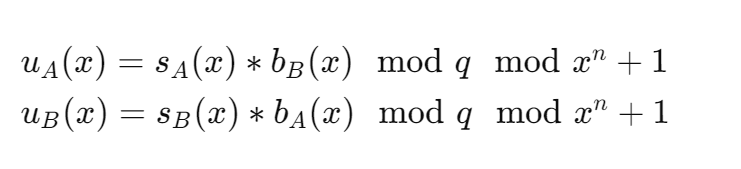







In [56]:
from numpy.polynomial import Polynomial

def poly_mod(p, modulus):
   """Polynomial modulus operation modulates each coefficient of the polynomial to an integer"""
    # Take modulo each coefficient of the polynomial
    return Polynomial([coef % modulus for coef in p])

def poly_ring_mod(p, x_n):
    """Modulo operation on polynomial ring, here use x^n + 1"""
    q, r = divmod(p, x_n)
    return r

def generate_private_key(n, q):
    """Generate a private key, here we use random coefficients for simplicity"""
    # It is assumed here that the private key is a low-weight polynomial, so random small integers are used as coefficients
    return Polynomial(np.random.randint(-q//2, q//2 + 1, n))

def generate_error(n, q):
    """Generate error item"""
    # To make the error term small enough and make u_A and u_B as equal as possible, correct encryption and decryption can be achieved.
    return Polynomial(np.random.randint(-(q//200), q//200, n))

def generate_public_key(private_key, a, q, x_n):
    """Generate public key"""
    # s(x) * a(x) mod q mod x^n + 1
    return poly_mod(poly_ring_mod(private_key * a, x_n), q)

# Define the parameters of the ring
n = 4  # The order of the polynomial, here x^4 + 1
q = 257  # Modulus
x_n = Polynomial([1] + [0]*(n-1) + [1])  # x^n + 1, here is x^4 + 1

#Define the public keys of Alice and Bob
a = Polynomial(np.random.randint(0, q, n))

# Generate Alice and Bob’s private keys and error items
s_A = generate_private_key(n, q)
e_A = generate_error(n, q)
s_B = generate_private_key(n, q)
e_B = generate_error(n, q)

def generate_public_key(private_key, a, q, x_n, error):
    """Generate public key"""
    # s(x) * a(x) + e(x) mod q mod x^n + 1
    return poly_mod(poly_ring_mod(private_key * a + error, x_n), q)

# Generate public information of Alice and Bob
b_A = generate_public_key(s_A, a, q, x_n, e_A)
b_B = generate_public_key(s_B, a, q, x_n, e_B)

# Display the generated polynomial
(s_A, e_A, s_B, e_B, b_A, b_B)


(Polynomial([ 67.,  72., -63., 123.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([ 0., -1., -1.,  0.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([ -92.,  -52., -115.,  -19.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([ 0.,  0.,  0., -1.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([ 10.,  30., 213., 142.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([225., 173., 184.,  16.], domain=[-1,  1], window=[-1,  1], symbol='x'))

In [57]:
# Alice uses her private key and Bob's public information to calculate the shared secret key
u_A = poly_mod(poly_ring_mod(s_A * b_B, x_n), q)

# Bob uses his private key and Alice's public information to calculate the shared key
u_B = poly_mod(poly_ring_mod(s_B * b_A, x_n), q)

# Display calculation results
(u_A, u_B)


(Polynomial([124., 256., 160., 256.], domain=[-1,  1], window=[-1,  1], symbol='x'),
 Polynomial([175., 135., 181., 233.], domain=[-1,  1], window=[-1,  1], symbol='x'))

The exchanged key is used below to implement the encryption and decryption process.

In a true quantum-resistant encryption system, text is first converted into numbers and then encrypted using a shared key. The specific process is:



1. Text encoding: Convert text into numbers, and convert each character into its ASCII code.
2. Encryption: Encrypting numbers with a shared key. This can be simplified by adding the coefficient of the shared secret to the numerical representation of the text.

3. Decryption: Decryption using the same key is basically the reverse process of encryption.

In [58]:
# Text encoding: Convert text to a list of ASCII values
def encode_text(text):
    return [ord(char) for char in text]

# Text decoding: Convert a list of ASCII values back to text
def decode_text(encoded_text):
    return ''.join(chr(number) for number in encoded_text)

# Simplified encryption process: add the coefficients of the shared key to the encoded text
def encrypt_text(encoded_text, key):
    key_coeffs = key.coef.astype(int).tolist()
    return [(number + key_coeffs[i % len(key_coeffs)]) % 256 for i, number in enumerate(encoded_text)]

# Simplified decryption process: subtract the coefficient of the shared secret from the encrypted text
def decrypt_text(encrypted_text, key):
    key_coeffs = key.coef.astype(int).tolist()
    return [(number - key_coeffs[i % len(key_coeffs)]) % 256 for i, number in enumerate(encrypted_text)]

# Text to be encrypted
text = "hello quantum world"

# encode text
encoded_text = encode_text(text)

# Encrypt text using shared key
encrypted_text = encrypt_text(encoded_text, u_A)

# Decrypt the text using the shared key
decrypted_text = decrypt_text(encrypted_text, u_A)

# Decode text
decoded_text = decode_text(decrypted_text)

# Display the original text, encrypted ASCII value, decrypted ASCII value and decoded text
print("original_text:",text)
print("encoded_text:",encoded_text)
print("encrypted_text:",encrypted_text)
print("decrypted_text:",decrypted_text)
print("decoded_text:",decoded_text)


original_text: hello quantum world
encoded_text: [104, 101, 108, 108, 111, 32, 113, 117, 97, 110, 116, 117, 109, 32, 119, 111, 114, 108, 100]
encrypted_text: [228, 101, 12, 108, 235, 32, 17, 117, 221, 110, 20, 117, 233, 32, 23, 111, 238, 108, 4]
decrypted_text: [104, 101, 108, 108, 111, 32, 113, 117, 97, 110, 116, 117, 109, 32, 119, 111, 114, 108, 100]
decoded_text: hello quantum world


# Implement key exchange, encryption and decryption based on NTT

The Fourier transform is a core concept in digital signal processing, and the Number Theoretic Transform (NTT) can be regarded as the Discrete Fourier Transform (DFT) defined on integers. The application of NTT in cryptography, especially in RLWE and polynomial multiplication, is very important because it can efficiently calculate polynomial multiplication modulo a certain type of prime number, which is often called "NTT friendly modulo q" Prime number". The basic steps for polynomial multiplication using NTT on polynomial rings are:



1. Apply NTT to the coefficients of the polynomial to transform them into the NTT domain.
2. In the NTT domain, the dot multiplication (term-by-term multiplication) of polynomials corresponds to the polynomial convolution (polynomial multiplication) in the original domain.
3. Apply inverse NTT to transform the product from the NTT domain back to the original domain.

Implementing NTT requires that the modulus q is an NTT-friendly prime number, which means that q must satisfy the form q=1+k×2 $^n$, where k is an integer, to ensure that there is a primitive root modulo a power of 2 of q. For example: use modulo 257, which is an NTT-friendly prime number.

In [67]:
import numpy as np
from numpy.polynomial import Polynomial

def is_power_of_two(n):
    return (n & (n - 1) == 0) and n != 0

def next_power_of_two(n):
    return 1 << (n-1).bit_length()

def pad_coefficients(coeffs, size):
    return np.pad(coeffs, (0, max(0, size - len(coeffs))), 'constant')

def ntt(a, q, n):
    """Compute the Number Theoretic Transform (NTT) of a polynomial"""
    if not is_power_of_two(n):
        raise ValueError("NTT length must be a power of two")

    if n == 1:
        return a

    a0 = ntt(a[:n//2], q, n//2)  # even indices
    a1 = ntt(a[n//2:], q, n//2)  # odd indices

    zeta = pow(2, (q-1) // n, q)  # n-th root of unity mod q
    omega = 1

    t = np.zeros(n, dtype=int)
    for i in range(n//2):
        u = a0[i]
        v = a1[i] * omega % q
        t[i] = (u + v) % q
        t[i + n//2] = (u - v) % q
        omega = omega * zeta % q

    return t

def inv_ntt(t, q, n):
    """Compute the inverse Number Theoretic Transform (NTT) of a polynomial"""
    t = ntt(t, q, n)  # NTT of the input
    n_inv = pow(n, q-2, q)  # Modular inverse of n
    return (t * n_inv % q)

def correct_ntt_and_inv_ntt_functions():
    n = 8
    q = 257
    coeffs = np.random.randint(0, q, n)

    # Ensure length is a power of two
    if not is_power_of_two(len(coeffs)):
        coeffs = pad_coefficients(coeffs, next_power_of_two(len(coeffs)))

    # Compute NTT and inverse NTT
    transformed = ntt(coeffs, q, len(coeffs))
    inverse_transformed = inv_ntt(transformed, q, len(coeffs))

    # Check if the original and the inverse transformed are the same
    assert np.allclose(coeffs % q, inverse_transformed)

    print("Original Coefficients:", coeffs)
    print("NTT Transformed:", transformed)
    print("Inverse Transformed:", inverse_transformed)

# Test the corrected NTT and inverse NTT
correct_ntt_and_inv_ntt_functions()


Original Coefficients: [243 243 167 235 161 232 111 250]
NTT Transformed: [100 236 116 136 134 142  52   0]
Inverse Transformed: [243 243 167 235 161 232 111 250]


In [70]:
# Polynomial operations
def poly_mod(p, modulus):
    return Polynomial([coef % modulus for coef in p])

def generate_private_key(n, q):
    return Polynomial(np.random.randint(-q//2, q//2 + 1, n))

def generate_error(n, q):
    return Polynomial(np.random.randint(-(q//200), q//200 + 1, n))

def generate_public_key(private_key, a, q, x_n, error):
    private_key_coeffs = private_key.coef.astype(int).tolist()
    a_coeffs = a.coef.astype(int).tolist()
    error_coeffs = error.coef.astype(int).tolist()

    n = len(x_n.coef)
    power_of_two = next_power_of_two(n)
    private_key_coeffs = pad_coefficients(private_key_coeffs, power_of_two)
    a_coeffs = pad_coefficients(a_coeffs, power_of_two)
    error_coeffs = pad_coefficients(error_coeffs, power_of_two)

    product = ntt(private_key_coeffs, q, power_of_two)
    a_product = ntt(a_coeffs, q, power_of_two)
    c_ntt = (product * a_product % q + error_coeffs) % q
    public_key = inv_ntt(c_ntt, q, power_of_two)

    return Polynomial(public_key[:n])

# Text encryption and decryption
def encrypt_text(encoded_text, key, q, n):
    key_ntt = ntt(key.coef.astype(int).tolist(), q, next_power_of_two(n))
    encrypted_text = [(number + key_ntt[i % len(key_ntt)]) % 256 for i, number in enumerate(encoded_text)]
    return encrypted_text

def decrypt_text(encrypted_text, key, q, n):
    key_ntt = ntt(key.coef.astype(int).tolist(), q, next_power_of_two(n))
    decrypted_text = [(number - key_ntt[i % len(key_ntt)]) % 256 for i, number in enumerate(encrypted_text)]
    return decrypted_text


n = 4  # Degree of polynomial
q = 257  # Modulus
x_n = Polynomial([1] + [0]*(n-1) + [1])  # x^n + 1, here n = 4 so it's x^4 + 1
a = Polynomial(np.random.randint(0, q, n))

s_A = generate_private_key(n, q)
e_A = generate_error(n, q)
b_A = generate_public_key(s_A, a, q, x_n, e_A)

s_B = generate_private_key(n, q)
e_B = generate_error(n, q)
b_B = generate_public_key(s_B, a, q, x_n, e_B)

u_A = generate_public_key(s_A, b_B, q, x_n, e_A)
u_B = generate_public_key(s_B, b_A, q, x_n, e_B)

text = "hello quantum world"
encoded_text = encode_text(text)
encrypted_text = encrypt_text(encoded_text, u_A, q, n)
decrypted_text = decrypt_text(encrypted_text, u_A, q, n)
decoded_text = decode_text(decrypted_text)

print("original_text:",text)
print("encoded_text:",encoded_text)
print("encrypted_text:",encrypted_text)
print("decrypted_text:",decrypted_text)
print("decoded_text:",decoded_text)


original_text: hello quantum world
encoded_text: [104, 101, 108, 108, 111, 32, 113, 117, 97, 110, 116, 117, 109, 32, 119, 111, 114, 108, 100]
encrypted_text: [6, 140, 10, 244, 13, 71, 15, 253, 255, 149, 18, 253, 11, 71, 21, 247, 16, 147, 2]
decrypted_text: [104, 101, 108, 108, 111, 32, 113, 117, 97, 110, 116, 117, 109, 32, 119, 111, 114, 108, 100]
decoded_text: hello quantum world
